In [1]:
def zalevsky(npfStart = 0.2, nucRate = 0.034):

    """
    Dendritic nucleation model from Zalevsky et al., Current Biology, Vol 11 No 24
    """
    from numpy import array, zeros, linspace, gradient, amax
    from matplotlib.pyplot import plot, xlabel, ylabel
    %matplotlib inline

    # Rate constants
    k_1a_for = 5.5
    k_1a_rev = 3.0
    k_2b_for = 5.5
    k_2b_rev = 3.0
    k_1b_for = 1.0
    k_2a_for = 1.0
    k_1b_rev = 0.4
    k_2a_rev = 0.4
    k_3_for = 8.6
    k_3_rev = 0.01
    k_4_for = nucRate
    dt = 1e-2
    num_steps = 30000

    actinArr = zeros(num_steps)
    actinArr[0] = 2.0
    npfArr = zeros(num_steps)
    npfArr[0] = npfStart
    arpArr = zeros(num_steps)
    arpArr[0] = 0.05

    npfActinArr = zeros(num_steps)
    npfArpArr = zeros(num_steps)
    npfActinArpArr = zeros(num_steps)
    filArr = zeros(num_steps)
    filArr[0] = 2.0 / 3.0
    npfActinArpFilArr = zeros(num_steps)

    for i in range(num_steps - 1):
        actin = actinArr[i]
        npf = npfArr[i]
        arp = arpArr[i]
        npfActin = npfActinArr[i]
        npfArp = npfArpArr[i]
        npfActinArp = npfActinArpArr[i]
        npfActinArpFil = npfActinArpFilArr[i]
        fil = filArr[i]

        d1a = (k_1a_for * npf * actin - k_1a_rev * npfActin) * dt
        npfActin += d1a
        npf -= d1a
        actin -= d1a

        d1b = (k_1b_for * npf * arp - k_1b_rev * npfArp) * dt
        npfArp += d1b
        npf -= d1b
        arp -= d1b

        d2a = (k_2a_for * npfActin * arp - k_2a_rev * npfActinArp) * dt
        npfActinArp += d2a
        npfActin -= d2a
        arp -= d2a

        d2b = (k_2b_for * npfArp * actin - k_2b_rev * npfActinArp) * dt
        npfActinArp += d2b
        npfArp -= d2b
        actin -= d2b

        d3 = (k_3_for * npfActinArp * fil - k_3_rev * npfActinArpFil) * dt
        npfActinArpFil += d3
        npfActinArp -= d3

        d4 = k_4_for * npfActinArpFil * dt
        fil += d4
        npfActinArpFil -= d4
        #npf += d4

        actinArr[i + 1] = actin
        npfArr[i + 1] = npf
        arpArr[i + 1] = arp
        npfActinArr[i + 1] = npfActin
        npfArpArr[i + 1] = npfArp
        npfActinArpArr[i + 1] = npfActinArp
        npfActinArpFilArr[i + 1] = npfActinArpFil
        filArr[i + 1] = fil
    
    timeArr = linspace(0.0, dt * (num_steps - 1), num_steps)
    gradTimeArr = gradient(timeArr)
    gradFilArr = gradient(filArr)
    plot(timeArr, filArr - filArr[0])
    nucRateArr = gradFilArr / gradTimeArr
    return amax(nucRateArr)

0.0010987257779315985

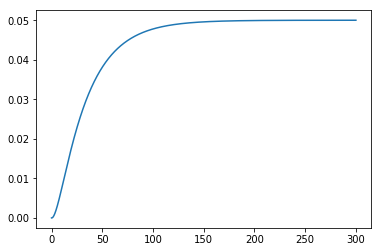

In [5]:
zalevsky(0.2,0.034)